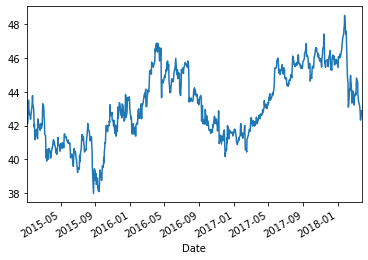

In [215]:
import quandl
 
# Get the data for Coca-cola
data = quandl.get("WIKI/KO", start_date="2015-01-01", api_key="xR8TA-S5RWRb6Stz4ePV")
 
# Plot the prices
import matplotlib.pyplot as plt
data.Close.plot()
plt.show()

In [49]:
df=data[["Open","High","Low","Close","Volume"]]
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,42.26,42.40,41.80,42.14,9921011.0
2015-01-05,42.69,42.97,42.08,42.14,26292592.0
2015-01-06,42.41,42.94,42.24,42.46,16897487.0
2015-01-07,42.80,43.11,42.58,42.99,13411970.0
2015-01-08,43.18,43.57,43.10,43.51,21743628.0


In [50]:
df.shape

(813, 5)

In [51]:
train = df[:700]
valid = df[700:]

In [52]:
valid.shape

(113, 5)

In [53]:
preds = []
for i in range(0,113):
    a = train['Close'][len(train)-113+i:].sum() + sum(preds)
    b = a/113
    preds.append(b)

In [54]:
#calculate rmse
import numpy as np
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
rms

1.3457437582631693

/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


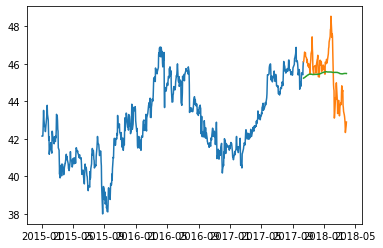

In [55]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

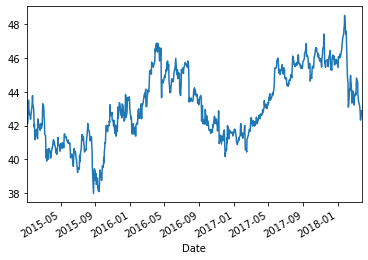

In [46]:
import quandl
 
# Get the data for Coca-cola
df = quandl.get("WIKI/KO", start_date="2015-01-01", api_key="xR8TA-S5RWRb6Stz4ePV")
 
# Plot the prices
import matplotlib.pyplot as plt
df.Close.plot()
plt.show()

In [75]:
#sorting
data = df.sort_index(ascending=True, axis=0)
data["Date"]=df.index
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [76]:
new_data.head()

,Date,Close
0,2016-01-21 00:00:00,46.71
1,2016-01-22 00:00:00,48.39
2,2016-01-25 00:00:00,47.92
3,2016-01-26 00:00:00,48.27
4,2016-01-27 00:00:00,47.4


In [77]:
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:700,:]
valid = dataset[700:,:]

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

Using TensorFlow backend.
/home/luis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/luis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/luis/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/luis/.local/lib/python3.6/site-packages/tensorflow/python/framewo

In [80]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [81]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

Epoch 1/1
 - 31s - loss: 0.0019


In [82]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

In [83]:
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

In [84]:

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)


In [85]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

4.016832177593838

/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


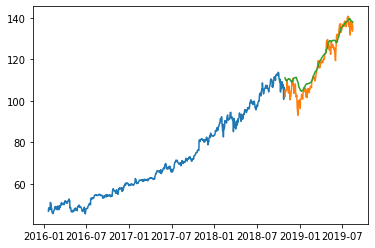

In [86]:
#for plotting
train = new_data[:700]
valid = new_data[700:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])


In [87]:
valid.head()

,Close,Predictions
Date,,
2018-10-30,102.13,111.133171
2018-10-31,105.16,110.665543
2018-11-01,104.28,110.325142
2018-11-02,104.52,110.036957
2018-11-05,105.85,109.807037


In [3]:
import bs4 as bs
import pandas as pd
import requests
import pickle


def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers
tickers=save_sp500_tickers()

In [4]:
tickers_limpio=[]
for i in tickers:
    a=i.replace('\n','')
    tickers_limpio.append(a)

In [5]:
for i in range(2):
    print(tickers_limpio[i])

MMM
ABT


In [3]:
#from yahoo_fin import stock_info as si

In [4]:
#si.get_live_price("aapl")

206.5

In [72]:
'''import yfinance as yf

msft = yf.Ticker("MSFT")
print(msft)'''

yfinance.Ticker object <MSFT>


In [73]:
#msft=msft.history(period="max")

In [74]:
#df=msft.tail(900)

Epoch 1/1
 - 34s - loss: 0.0019


/home/luis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


NameError: name 'df_predictions' is not defined

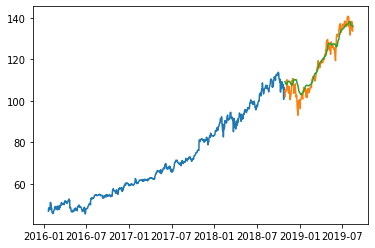

In [92]:
'''data = df.sort_index(ascending=True, axis=0)
data["Date"]=df.index
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:700,:]
valid = dataset[700:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

train = new_data[:700]
valid = new_data[700:]
valid['Predictions'] = closing_price
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])'''



In [13]:
import yfinance as yf

comp = yf.Ticker(tickers_limpio[0])

comp=comp.history(period="max")


df=comp.tail(900)


data = df.sort_index(ascending=True, axis=0)
data["Date"]=df.index
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

In [14]:
df_pred=new_data[700:]
df_predicciones=new_data[700:]

In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

In [16]:
import yfinance as yf
for i in range(3):
    print(tickers_limpio[i])
    company = yf.Ticker(tickers_limpio[i])
    company=company.history(period="max")
    df=company.tail(900)
    data = df.sort_index(ascending=True, axis=0)
    data["Date"]=df.index
    #creating a separate dataset
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]

    new_data.index = new_data.Date
    new_data.drop('Date', axis=1, inplace=True)

    #creating train and test sets
    dataset = new_data.values
    train = dataset[0:700,:]
    valid = dataset[700:,:]
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    x_train, y_train = [], []
    for i in range(60,len(train)):
        x_train.append(scaled_data[i-60:i,0])
        y_train.append(scaled_data[i,0])
    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

    #predicting 200 values, using past 60 from the train data
    inputs = new_data[len(new_data) - len(valid) - 60:].values
    inputs = inputs.reshape(-1,1)
    inputs  = scaler.transform(inputs)

    X_test = []
    for i in range(60,inputs.shape[0]):
        X_test.append(inputs[i-60:i,0])
    X_test = np.array(X_test)

    X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
    closing_price = model.predict(X_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    '''train = new_data[:700]
    valid = new_data[700:]
    valid['Predictions'] = closing_price
    plt.plot(train['Close'])
    plt.plot(valid[['Close','Predictions']])'''
    
    
    df_pred[tickers_limpio[i]]= closing_price
    df_predicciones=pd.concat([df_predicciones, df_pred], axis=1)

MMM
Epoch 1/1
 - 30s - loss: 0.0042
ABT
Epoch 1/1
 - 31s - loss: 0.0026
ABBV
Epoch 1/1
 - 31s - loss: 0.0061


In [17]:
df_predicciones_limpio=df_predicciones.drop(["Close"],axis=1)

In [18]:
df_predicciones_limpio.head()

,IPG,IPG,IPG
Date,,,
2018-10-30,185.687668,64.053986,79.129929
2018-10-31,184.484512,63.930607,78.496353
2018-11-01,183.726425,63.912369,77.745720
2018-11-02,183.426331,64.027748,77.186111
2018-11-05,183.440918,64.213669,76.725914


In [19]:
df_predicciones_limpio.shape

(200, 3)

In [23]:
df_predicciones_limpio.columns = tickers_limpio[:3]
df_predicciones_limpio.head()

,MMM,ABT,ABBV
Date,,,
2018-10-30,185.687668,64.053986,79.129929
2018-10-31,184.484512,63.930607,78.496353
2018-11-01,183.726425,63.912369,77.745720
2018-11-02,183.426331,64.027748,77.186111
2018-11-05,183.440918,64.213669,76.725914
